# Introducrtion to Machine Learning: Assignment #3
## Submission date: 09\07\2024, 23:55.
### Topics:
- Multiclass Classification
- PAC, VCdim
- Bias vs Variance
- Cross validation
- Linear Regression
- Decision Trees

Submitted by:

 **Student 1 Obaida Khateeb+201278066

 **Student 2 Adham Dahli+318575834

**Assignment Instruction:**

· Submissions in pairs only.

· Try to keep the code as clean, concise, and short as possible

· If you wish to work in your IDE, you can, but you **must**,  insert the script back to the matching cells of the notebook and run the code. <br/>Only the notebook will be submitted in moodle (in `.ipynb` format).

· <font color='red'>Please write your answers to question in red</font>.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output). <br/>

**Important:** Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to grade 0 and disciplinary actions.


## Question 1 - Multiclass SVM

You will implement and compare different multiclass methods in both separable and non separable cases.

In [55]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


As seen in tutorials, One vs One is usually a better choice than other methods, even SKlearn uses it! <br/>
You are given a partial implementation of OvO classifier and need to complete it. Specifically:<br/>
- ```__init__(self, n_classes=2, C=1.0)``` - Init $\binom{n}{2}$ estimators, one for each pair of classes.

- ```fit(self, X, y)``` - given data and labels learns the classifiers using linear SVM. <br/>

- ```predict(self, X)``` - as learned in lectures, prediction for sample will be the majority class got most votes from all the classifiers.  Therefore, $\forall i<j$ predict who is the winner for X in the estimator $(i,j)$ and update the bins accordinly.

In [56]:
from collections import defaultdict

class OneVsOneClassifier:
    def __init__(self, n_classes=2, C=1.0):
        # Add code here
        self.n_classes = n_classes
        self.C = C
        self.estimators = defaultdict(None)
        #Initializing estimator for each of the classes pairs
        for i in range(self.n_classes):
            for j in range(i + 1, self.n_classes):
                self.estimators[(i, j)] = SVC(kernel='linear', C=self.C)

    def fit(self, X, y):
        for i in range(self.n_classes):
            for j in range(i + 1,self.n_classes):
                # Add code here
                relevant_samples = (y == i) | (y == j) #Marking the indexes of the samples that belong to one of the classes i,j
                temp_X = X[relevant_samples] #Extracting the samples of the classes i,j
                temp_y = y[relevant_samples] #Extracting the labels of the samples belong the classes i,j
                temp_y = np.where(temp_y == i, 1, -1) #converting the labels to 1,-1
                self.estimators[(i,j)].fit(temp_X, temp_y) #Training the (i,j) SVM classifier to distinguish between the samples of i,j

    def predict(self, X):
        scores = np.zeros((self.n_classes, len(X)))
        for i in range(self.n_classes):
            for j in range(i + 1, self.n_classes):
                # Add code here
                predictions = self.estimators[(i, j)].predict(X) #Applying each of the classifiers on the samples
                #Iterating over the X samples and for each counting the votes for each of the classes that have been received from the classifiers
                for sample in range(len(predictions)):
                    if predictions[sample] == 1:
                        scores[i, sample] += 1
                    else:
                        scores[j, sample] += 1

        return np.argmax(scores, axis=0)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

The data

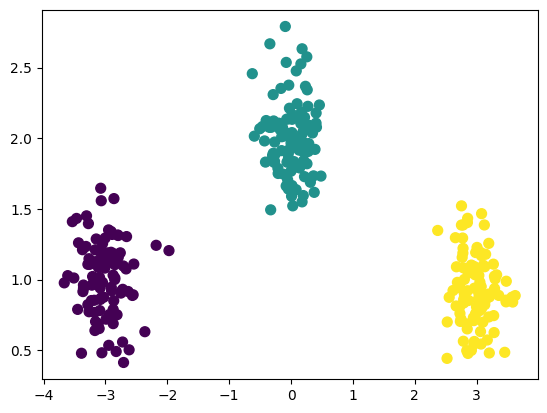

In [57]:
from sklearn.datasets import make_blobs

np.random.seed(2)
X, y = make_blobs(n_samples=300,cluster_std=.25, centers=np.array([(-3,1),(0,2),(3,1)]))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

This will test the classifier we just built by plotting confusion matrix and draw the decision boundaries. <br/>
Does the value of C matter? <br/>
<font color='red'>Write here your answer and explain</br> In this specific case, where the classes are linearly separable, the value of C doesn't matter and doesn't impact the decision boundaries, because there are no misclassified samples. In other scenarios, where there are misclassified samples there will be a need to trade-off between the margin size and the number of misclassified samples. This trade-off is controlled and regulated by C value, then the C value will have a more significant implications.</font>

array([[100,   0,   0],
       [  0, 100,   0],
       [  0,   0, 100]])

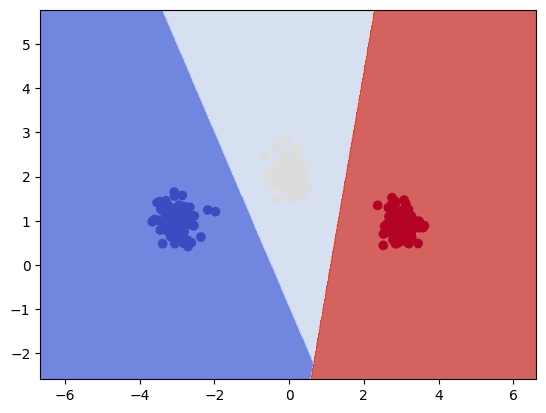

In [58]:
from sklearn import metrics #Importing the metrics module, added due to the error that 'metrics' is not defined


clf_onevsall = OneVsOneClassifier(n_classes=3, C=2)
clf_onevsall.fit(X,y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = min(X[:,0])-3,max(X[:,0])+3
y_min, y_max = min(X[:,1])-3,max(X[:,1])+3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_input = np.c_[xx.ravel(), yy.ravel()]

Z = clf_onevsall.predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

metrics.confusion_matrix(y, clf_onevsall.predict(X))

Generate another data



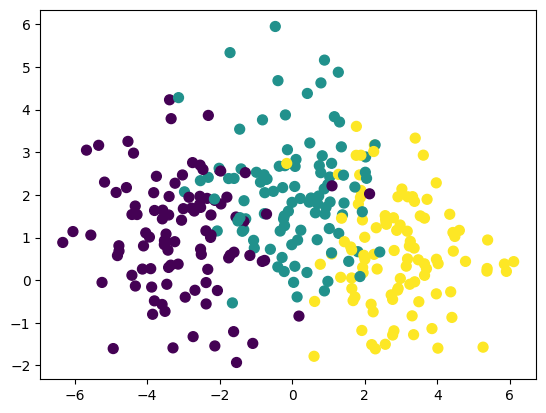

In [59]:
np.random.seed(2)
X, y = make_blobs(n_samples=300,cluster_std=1.25, centers=np.array([(-3,1),(0,2),(3,1)]))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

Look at the train vs test for different values of C. <br/> Justify the plot, by checking what happens as $C\rightarrow 0$, $C\rightarrow \infty$ and mid value C.<br/>
<font color='red'>Write here your answer and explain</br>
Although the differences between the accuracies achieved using different values of C are not significant, we can observe that the best accuracy achieved when implementing the classifier on training data when mid value of C was used, while the best test accuracy achieved when implementing low value C. Also, the test accuracy decreased gradually as the value of C increased. Also it was noticable that the accuracies, both in training and test data, became stable when values of C were larger than 4. Here's a summary regarding accuracies achieved using different values of C:</br>
Low value C ($C\rightarrow 0$): Low training accuracy rate, likley due to underfitting. The model is simple and unable to identify the small variances (noise) in the training data, this underfitting, however lead to a better generalization on unseen data, as reflected by a high test accuracy</br>
High value C ($C\rightarrow \infty$): Low training accuracy, but higher than the "Low value C" case. This increase compared to low value C could be as a result of the overfitting caused by choosing high value C, which was in the expense of the the generalization on unseen data that reflcted by the low test accuracy achieved.</br>
Mid value C: The highest training accuracy among the three cases, could be as a result of that the model has being able to balance between the margin size and the classification error. The model here is more complex than in low value C case and able to capture some range of noise which make it less able to generalize on unseen data, which make the test accuracy avhieved lower than the 'Low C' case but higher than the 'High C' case, indicating a reasonable balance between fitting to the training data and generalizing to the new data.</font>

100%|██████████| 4/4 [00:00<00:00, 80.12it/s]


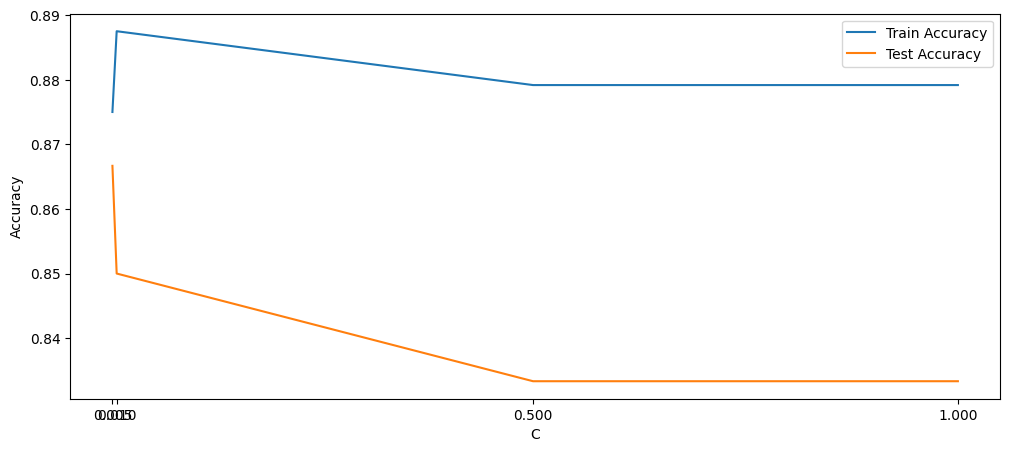

In [60]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of C values
C_values = [5e-3, 1e-2, 0.5, 1]

train_accuracies = []
test_accuracies = []

for C in tqdm(C_values):
    # Create a new OneVsOneClassifier instance
    clf_onevsall = OneVsOneClassifier(n_classes=3, C=C)

    # Fit the classifier on the training data
    clf_onevsall.fit(X_train, y_train)

    # Calculate the train and test accuracies
    train_accuracy = clf_onevsall.score(X_train, y_train)
    test_accuracy = clf_onevsall.score(X_test, y_test)

    # Append the accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the train and test accuracies as a function of C

plt.figure(figsize=(12,5))
plt.plot(C_values, train_accuracies, label="Train Accuracy")
plt.plot(C_values, test_accuracies, label="Test Accuracy")
plt.xlabel("C")
plt.xticks(C_values)
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Now, you will experience little bit from softmax. It uses neural networks, but you dont have to understand it. The importand part is the preidction, which is obtained by:
```
def forward(self, x):
        out = self.linear(x)
        return torch.softmax(out, dim=1)
```
Note that this is exactly that you saw - linear score $s_j$ and then applying softmax.

The best results are obtained using 300 epochs (iterations) and in each iteration the batch size is the entire data. <br/>
1. What happens as you use 100,600 epcohs compared to 300? why is that?
2. Use 300 epochs with batch size 50 vs the entire data. How does the batch size affect the convergence of the problem?

<font color='red'>Write here your answers and explain them</br>1. when using 100 epochs, the accuracy achieved on test data was 0.7833. When using 600 epochs the accuracy was 0.8. Both are lower than the accuracy achieved when usied 300 eopchs which was 0.8167. The low accuracy when using 100 epochs could be because the model didn't have enough time to train and learn all the patterns in the data, causing the model to underfit and being unable to perform optimally on test data.Conversely, in the case where we used 600 epochs the model had enough time to learn not only the patterns, but also the noise, leading to overfitting and a slight decrease test accuracy compared to the case where we used 300 epochs. It appears that 300 was the ideal number of epochs needed for the model to have a good balance, allowing it to converge properly and generalize well to the test data.
</br>2. When using the whole dataset as the batch size, the accuracy achieved was 0.8167, in the other hand, using a batch size of 50, resulted in lower accuracy - 0.7833. The difference in accuracy between the two cases can be explained by the fact that using the whole dataset for the gradient descent calculation led to a stable, accurate and less noisy updates of the model parameters, which made him converge properly toward the minimum.</font>

In [61]:
num_epochs = 300
batch_size = len(X_train)
print(f"Training size is {X_train} samples and batch size is {batch_size}")

Training size is [[ 4.40560358e+00 -8.72299757e-01]
 [ 1.63979804e+00  5.26805585e-02]
 [-4.77652153e+00  8.08131005e-01]
 [ 3.47900558e+00  4.78757314e-01]
 [ 3.97435007e+00  2.28324744e+00]
 [-7.14227010e-01  2.36554008e+00]
 [ 1.81396237e+00  6.68840150e-01]
 [-4.09763487e+00  8.04457287e-01]
 [ 9.82682587e-01  2.24271087e+00]
 [ 3.24532862e+00 -9.48704625e-02]
 [-3.39188525e+00  1.96376467e+00]
 [ 9.34498677e-01  1.70887875e+00]
 [-5.24179448e+00 -5.21842071e-02]
 [-4.85308185e+00  2.05788986e+00]
 [ 1.28523112e+00  1.09765034e+00]
 [ 1.09968175e+00  2.21357665e+00]
 [ 3.37904304e+00 -3.73435559e-02]
 [ 1.97637600e+00  5.84200919e-01]
 [-3.40631204e+00  2.99706867e-01]
 [ 1.93536337e+00  1.60521495e+00]
 [ 2.80698755e+00 -1.18661100e+00]
 [ 1.56056287e+00  4.42841809e-01]
 [-1.54809814e+00  1.48259756e+00]
 [ 1.64181481e+00  7.11353128e-01]
 [ 1.16485920e+00  3.83541517e+00]
 [-3.57750669e+00  1.43861062e+00]
 [ 8.26580210e-02  2.66944794e+00]
 [ 3.64865616e+00  3.83756361e-01]
 [-

In [62]:
#@title This will train the model using softmax

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Define the simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.linear1 = nn.Linear(input_size, output_size)
        self.linear1.weight.data.fill_(1)
        self.linear1.bias.data.fill_(1)

    def forward(self, x):
        out = self.linear1(x)
        return torch.softmax(out, dim=1)

# Set hyperparameters
input_size = X_train_tensor.shape[1]
output_size = len(torch.unique(y_train_tensor))
learning_rate = 0.01

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Instantiate the model and define the optimizer
model = SimpleNN(input_size, output_size)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear gradients

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    #if (epoch + 1) % 10 == 0:
    #    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on test data
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

    accuracy = correct / total
    print(f'Accuracy on test set: {accuracy:.4f}')

Accuracy on test set: 0.8167


array([[96,  2,  2],
       [24, 56, 20],
       [ 0,  5, 95]])

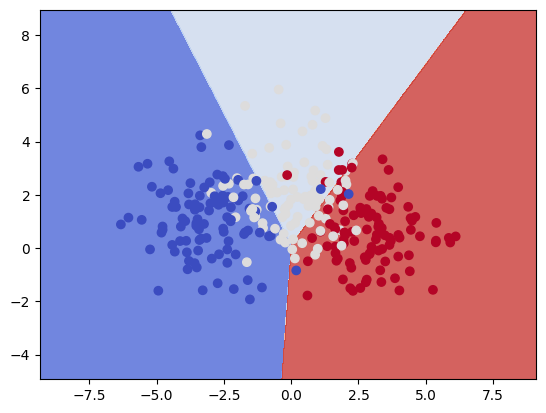

In [63]:
#@title This will plot the boundaries of the model

def predict(data):
    outputs = model(torch.tensor(data, dtype=torch.float32))
    _, predicted = torch.max(outputs, 1)
    return predicted

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = min(X[:,0])-3,max(X[:,0])+3
y_min, y_max = min(X[:,1])-3,max(X[:,1])+3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_input = np.c_[xx.ravel(), yy.ravel()]

Z = predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

metrics.confusion_matrix(y, predict(X))

## Question 2 - Linear Regression
You are requested by the Charles Darvin himself to predict the age of abalone from physical measurements.
The dataset consists of 7 continious features that he has collected for you.

In [64]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

We define the following:
-	X, 2d matrix from size n x d which represents the training samples.
-	y, array from size n which represents the target value for the corresponding sample.

Implement the function Linreg_sol(X,y) which outputs the closed form solution for linear regression on X,y. <br/>
Don't use pinv

In [65]:
def Linreg_sol(X, y):
	# Implement here
	b= np.ones((X.shape[0], 1)) #creating n*1 matrix of 1's where n is number of rows in data
	Y = np.concatenate([b,X], axis=1) #converting data samples to augmented vectors by adding 1's column to them
	w = Y.T @ Y # (Y^T)*Y
	w = np.linalg.inv(w) # ((Y^T)*Y)^-1
	w = w @ Y.T # (((Y^T)*Y)^-1)*Y^T
	w = w @ y # ((((Y^T)*Y)^-1)*Y^T)*y
	return w

Load data from https://sharon.srworkspace.com/ml/datasets/hw3/abalone.csv

In [66]:
# Implement here

data = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw3/abalone.csv', header = None)

Your tasks are:
- Convert to numpy
- Preproccess the data
- Find the weight vector and the bias

In [67]:
# Implement here

#Converting to Numpy
data = np.array(data)
X = data[:,:-1]
y = data[:,-1]

#Preprocessing
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0) #Scaling/regularizing the features
y = (y - np.mean(y))/ np.std(y, axis=0) #Scaling the target Y

#Finding the weight vector and the bias
w = Linreg_sol(X, y)

# Suppose w is the solution
print(f'The linear line is {w[1]:.2f}x1+{w[2]:.2f}x2+{w[3]:.2f}x3+{w[4]:.2f}x4+{w[5]:.2f}x5+{w[6]:.2f}x6+{w[7]:.2f}x7+{w[0]:.2f}=0')

The linear line is -0.06x1+0.41x2+0.15x3+1.41x4+-1.39x5+-0.33x6+0.37x7+0.00=0


Now, implement 'Linreg_sol_via_GD' which implement gradient descent on the linear regression problem. The stopping criterion should be based only by the iterations number recived as parameter

In [68]:
def Linreg_sol_via_GD(X, y, lr, iter_number):
    w = np.ones(X.shape[1])
    # Implement here
    w0 = 0 #initiallizing w0 to be 0
    for index in range(iter_number):
        y_pred = X @ w.T + w0 #computing fw(x) by multiplying each sample by the weight vector and adding w0
        w0_step = lr * np.sum(y_pred - y) / X.shape[0] #computing the gradient step for w0
        w_step = lr * (X.T @ (y_pred - y)) / X.shape[0] #computing the gradient step for w
        w0 = w0 - w0_step #updating w0
        w = w - w_step #updating w
    w = np.append(w0, w) #adding w0 as the first element to the weight vector
    return w

The following code measures the number of iterations as a function of the error gap between the returned weights and the correct solution. <br/>
Conclude the complexity formula required - How many iterations do we need as a function of the error, $\varepsilon$? Make sure to include the $𝚶$ notation in your answer. <br/>
Note: This error is sometimes called 'gap'. <br/>
<font color='red'>The number of iterations needed to reach a certain error gap in gradient descent can be expressed in terms of the learning rate and the error. Thus, as the error gap decreases, the number of iterations required increases. This inversely proportional relationship can be expressed as: $$\text{Iterations number} = O\left(\frac{1}{\varepsilon}\right)$$</font>

100%|██████████| 90/90 [00:42<00:00,  2.10it/s]


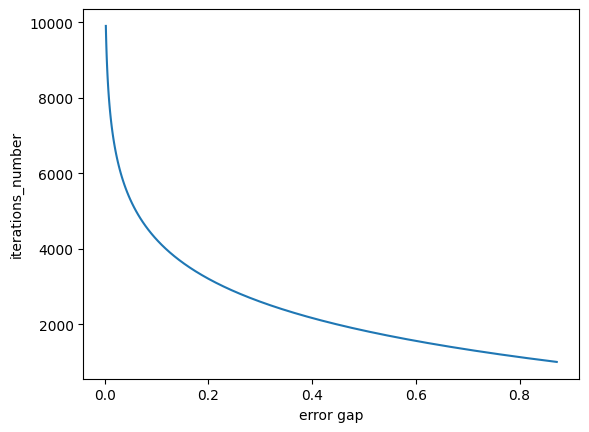

In [69]:
w_real = w

iters = np.arange(1000, 10_000, 100)
gaps = []

for iter in tqdm(iters):
    w = Linreg_sol_via_GD(X, y, lr=0.1, iter_number=iter) #changed from iter to iter_number = iter
    gaps.append(np.linalg.norm(w_real - w))

plt.plot(gaps, iters)
plt.ylabel("iterations_number")
plt.xlabel("error gap")
plt.show()

In the second part of the task, we will see the features dependence and try to solve it.

Calculate the the value of $\text{Cov}(X)=\frac{1}{n-1}(X-\mu)^\top (X-\mu)$? <br/>
- What can you imply from this about the features?
- Can we imply something on $X^\top X$? Must its det be 0?

Note: In your calculations, make sure the bias is not included as feature. <br/>
<font color='red'>- Based on the covariance matrix, we observe a high correlation (0.78-0.99) between every pair of features, which indicates a strong linear relationship among the different features. </br> - The high correlation between the different features observed by the covariance matrix, and the fact that the matrix $X^\top X$ is related to the covariance matrix by a scalar factor, could lead to a singular $X^\top X$ matrix with determinant that's close to or equal to zero, which make it non-invertible.</font>

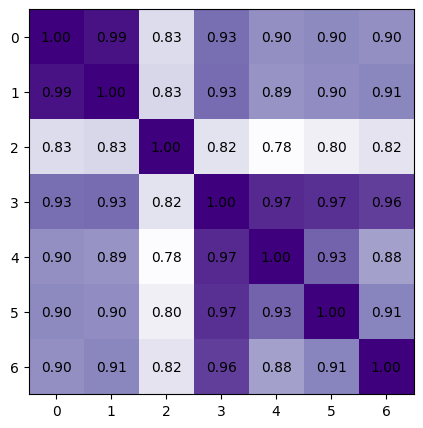

In [70]:
# Implement here

#computing the covariance matrix according to the formula
expectation = np.mean(X, axis=0)
updated_X = X - expectation #This is a techinal unnecessary step, because the expectation of each of the features is already 0 due to the preprocessing made previously, but still we chose to make it so that to be clear that we followed the above formula
cov_x = updated_X.T @ updated_X / (X.shape[0] - 1)
#creating and printing a heatmap representation of the covariance matrix
plt.figure(figsize=(5, 5))
heatmap = plt.imshow(cov_x, cmap='Purples', interpolation='nearest')
for i in range(cov_x.shape[0]):
    for j in range(cov_x.shape[1]):
        plt.text(j, i, f'{cov_x[i, j]:.2f}', ha='center', va='center', color='black')

Implement the solution to ridge regression using GD.

In [71]:
def Linreg_sol_Ridge(X, y, lamda):
    # Implement here
    b= np.ones((X.shape[0], 1)) #creating n*1 matrix of 1's where n is number of rows in data
    Y = np.concatenate([b,X], axis=1) #converting data samples to augmented vectors by adding 1's column to them
    w = Y.T @ Y # (Y^T)*Y
    I = np.eye(Y.shape[1]) #identify matrix
    w = w + lamda * I #adding positive constant lambda to each of the diagonal elements of the matrix
    w = np.linalg.inv(w) # ((Y^T)*Y)^-1
    w = w @ Y.T # (((Y^T)*Y)^-1)*Y^T
    w = w @ y # ((((Y^T)*Y)^-1)*Y^T)*y
    return w[1:]


The following code measures the mse error as function of the regularization hyperparameter lamda. <br/>Explain the origin to the mse' behaviour as function of lamda in this problem. <br/>
<font color='red'>The mean squared error (MSE) behavior as a function of the regularization parameter lambda is due to the trade-off between bias and variance. When lambda is small, the regularization effect is minimal, leading to a complex model that can overfit the training data, resulting in a lower training error but a higher validation/test error. As lambda increases, the regularization term starts to penalizes large weights, reducing the model complexity, learning less noise from the data and potentially improving generalization. However, too large lambda can lead to underfitting, where the model is too simple to capture even the underlying patterns, resulting in higher training error.</font>

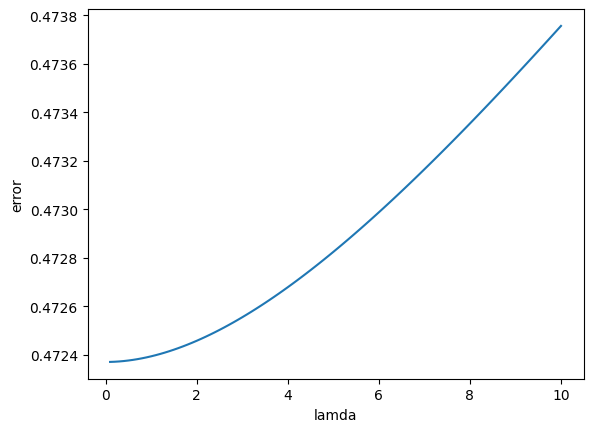

In [72]:
mses = []
lamdas = np.arange(0.1, 10.1, 0.1)

for lamda in lamdas:

    w = Linreg_sol_Ridge(X, y, lamda)

    preds = np.dot(X, w)
    mses.append(np.mean((preds - y) ** 2))

plt.plot(lamdas, mses)
plt.ylabel("error")
plt.xlabel("lamda")
plt.show()

## Question 3 - Decision tree

Recall the wine dataset from hw1, where we classified wine types based on their physical and chemical properties. You will do it, but this time with decision trees!

In [49]:
# Import libraries

import numpy as np
import pandas as pd

In [50]:
# Load the data, print the first rows

data = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw1/wine.data.csv')
data.head(3)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1


Complete this missing implementation of the following functions:
- ```calculate_entropy(self, data)``` – given data, compute the entropy, where the distribution is over its labels (target class).
- ```calculate_information_gain(self, data, feature)``` – given data and specific feature, compute the information gain given by selecting that feature.

Algorithm: The data is continuous, so create 10 thresholds between the min and max values of that feature. For each threshold, split to left tree and right tree and calculate the gain. Choose the threshold which gives the highest gain, along with the gain itself (to later compare between features) <br/>

Tip: To split the tree (represented by data df), use filter_data.
For example, when calculating the gain of 'skew' with threshold 0.5, you can create the left tree by use ```filter_data(data, 'skew', '0.5', left=True)``` to obtain only those samples.

In [51]:
# Define the ID3 decision tree class
class DecisionTree:
	def __init__(self, max_depth=np.inf):
		self.tree = {}
		self.max_depth = max_depth #Attribute added for the purpose of limiting the tree maximum depth

	def calculate_entropy(self, data):
		labels = data.iloc[:, -1]
		# Implement here
		unique_classes = np.unique(labels) #extract the unique classes
		entropy = 0 #initiallizing entropy to be 0
		for instance in unique_classes:
			class_entropy = np.sum(labels == instance) / len(labels) #computing probability of each class
			if (class_entropy !=0):
				class_entropy *= np.log2(class_entropy) #multiplying the probability by its log base 2 as the formula states
			entropy += class_entropy #adding the class entropy to the total entropy
		entropy *= -1 #multiplying by (-1) according to the entropy impurity formula
		return entropy


	def calculate_information_gain(self, data, feature):
		total_entropy = self.calculate_entropy(data)
		information_gain = total_entropy

		min_val = data[feature].min() #the minimum value of the feature among all samples
		max_val = data[feature].max() #the maximum value of the feature among all samples
		step = (max_val - min_val) / 9
		values = [min_val + i * step for i in range(10)] #Choosed the values that splits the range between (min value) and (max value) to 10 equal intervals
		best_treshold = None
		best_gain = 0
		for value in values:
			# Implement here
			less_data = self.filter_data(data, feature, value, left=True) #extracting the samples which their feature value is less than the current value
			more_data = self.filter_data(data, feature, value, left=False) #extracting the samples which their feature value is more or equal to the current value
			#computing the probability of the samples in each of the two groups
			less_data_probability = len(less_data) / len(data)
			more_data_probability = len(more_data) / len(data)
	 		#computing the entropy of each of the two groups
			less_data_entropy = self.calculate_entropy(less_data)
			more_data_entropy = self.calculate_entropy(more_data)
			gain = total_entropy - (less_data_probability * less_data_entropy + more_data_probability * more_data_entropy) #computing the information gain for the current partition
			#updating the best gain and the best treshold
			if gain > best_gain:
				best_gain = gain
				best_treshold = value
		return best_gain, best_treshold

	def filter_data(self, data, feature, value, left=True):
		if left:
			return data[data[feature] <= value].drop(feature, axis=1)
		else:
			return data[data[feature] > value].drop(feature, axis=1)

	def create_tree(self, data, depth=0):
		# Recursive function to create the decision tree
		labels = data.iloc[:, -1]

		# Base case: if all labels are the same, return the label
		if len(np.unique(labels)) == 1:
			return list(labels)[0]

		features = data.columns.tolist()[:-1]
		# Base case: if there are no features left to split on, return the majority label
		if len(features) == 0 or depth == self.max_depth: #the condition of reaching the maximum depth has been added
			unique_labels, label_counts = np.unique(labels, return_counts=True)
			majority_label = unique_labels[label_counts.argmax()]
			return majority_label

		selected_feature = None
		best_gain = 0
		best_treshold = None

		for feature in features:
			gain, treshold = self.calculate_information_gain(data, feature)
			if gain >= best_gain:
				selected_feature = feature
				best_treshold = treshold
				best_gain = gain

		# Create the tree node
		tree_node = {}
		tree_node[(selected_feature, f"<={best_treshold}")] = self.create_tree(self.filter_data(data, selected_feature, best_treshold, left=True), depth+1)
		tree_node[(selected_feature, f">{best_treshold}")] = self.create_tree(self.filter_data(data, selected_feature, best_treshold, left=False), depth+1)

		# check if can unite them.
		if not isinstance(tree_node[(selected_feature, f"<={best_treshold}")], dict) and \
				not isinstance(tree_node[(selected_feature, f">{best_treshold}")], dict):
			if tree_node[(selected_feature, f"<={best_treshold}")] == tree_node[(selected_feature, f">{best_treshold}")]:
				return tree_node[(selected_feature, f"<={best_treshold}")]

		return tree_node

	def fit(self, data):
		self.tree = self.create_tree(data)

	def predict(self, X):
		X = [row[1] for row in X.iterrows()]

		# Predict the labels for new data points
		predictions = []

		for row in X:
			current_node = self.tree
			while isinstance(current_node, dict):
				split_condition = next(iter(current_node))
				feature, value = split_condition
				treshold = float(value[2:])
				if row[feature] <= treshold:
					current_node = current_node[feature, f"<={treshold}"]
				else:
					current_node = current_node[feature, f">{treshold}"]
			predictions.append(current_node)

		return predictions

	def _plot(self, tree, indent):
		depth = 1
		for key, value in tree.items():
			if isinstance(value, dict):
				print(" " * indent + str(key) + ":")
				depth = max(depth, 1 + self._plot(value, indent + 2))
			else:
				print(" " * indent + str(key) + ": " + str(value))
		return depth

	def plot(self):
		depth = self._plot(self.tree, 0)
		print(f'depth is {depth}')


You are ready - define DecisionTree, fit it on the entire data and plot the tree. <br/>
The depth of the tree should be 5

In [52]:
# Implement here
tree = DecisionTree()
tree.fit(data)
tree.plot()


('Flavanoids', '<=1.3933333333333335'):
  ('Color intensity', '<=4.405555555555556'):
    ('Hue', '<=0.9022222222222223'):
      ('Proline', '<=372.0'): 2
      ('Proline', '>372.0'): 3
    ('Hue', '>0.9022222222222223'):
      ('Malic acid', '<=3.167777777777778'): 2
      ('Malic acid', '>3.167777777777778'): 3
  ('Color intensity', '>4.405555555555556'): 3
('Flavanoids', '>1.3933333333333335'):
  ('Proline', '<=745.3333333333333'):
    ('Alcohol', '<=13.231111111111112'): 2
    ('Alcohol', '>13.231111111111112'):
      ('Color intensity', '<=3.96'): 2
      ('Color intensity', '>3.96'):
        ('OD280/OD315 of diluted wines', '<=1.3'): 3
        ('OD280/OD315 of diluted wines', '>1.3'): 1
  ('Proline', '>745.3333333333333'):
    ('Alcohol', '<=12.597777777777779'): 2
    ('Alcohol', '>12.597777777777779'):
      ('Color intensity', '<=3.35'): 2
      ('Color intensity', '>3.35'): 1
depth is 5


The decision tree is pretty large (depth is 5). To solve this, lets modify our DecisionTree: <br/>
```
def __init__(self, max_depth=np.inf):
        self.tree = {}
        self.max_depth = max_depth
```

Modify the rest of the code to stop growing after max_depth. <br/>
Hint: When reached to max_depth, should we continue splitting? Which category will be best to be selected?


Using 10 thresholds, compare using max_depth=2 and max_depth=4. Based on the results, which depth is better for our problem in term of ML? <br/>
<font color='red'>Write your answer here and explain it</br> The training accuracy achieved when max_depth = 4 is about 0.985, which is significantly higher than the accuracy achieved when max_depth = 2. However, both achieved the same accuracy rate when Implemented on test data. This suggests that the model with max_depth=4 may be overfitting the training data. Therefore, we are going to choose the model with max_depth = 2 for the mentioned reason (less likeliness of overfitting), and because of its reduced complexity compared to the model with max_depth = 4.</font>

In [53]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)

for depth in [2, 4]:
  print(f"------------ max_depth={depth} ------------")
  # Implement here

  #Training the model
  tree = DecisionTree(max_depth=depth)
  tree.fit(train)

  #Computing the training data accuracy
  train_predictions = tree.predict(train)
  train_labels = train.iloc[:, -1].values
  acc = np.sum(train_predictions == train_labels) / len(train_labels)
  print(f'Training accuracy is {acc}')

  # Implement here

  #Computing the test data accuracy
  test_predictions = tree.predict(test)
  test_labels = test.iloc[:, -1].values
  acc = np.sum(test_predictions == test_labels) / len(test_labels)
  print(f'Test accuracy is {acc}')
  print()

------------ max_depth=2 ------------
Training accuracy is 0.9225352112676056
Test accuracy is 0.8888888888888888

------------ max_depth=4 ------------
Training accuracy is 0.9859154929577465
Test accuracy is 0.8888888888888888



Now, use KFold (as seen in tutorials) for a cross validation search to the best depth for the tree.

100%|██████████| 5/5 [00:48<00:00,  9.64s/it]


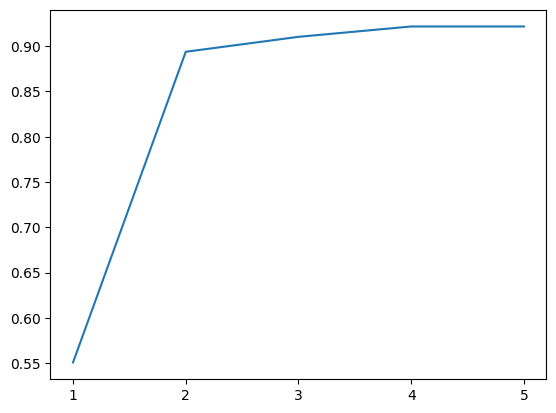

In [54]:
from sklearn.model_selection import KFold
from tqdm import tqdm
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accs = []

for depth in tqdm(range(1,6)):
    # Implement here
    fold_accs = []
    for train_index, val_index in kf.split(data):
        train = data.iloc[train_index]
        val = data.iloc[val_index]

        #Training the model
        tree = DecisionTree(max_depth=depth)
        tree.fit(train)

        #Computing the validation accuracy
        val_predictions = tree.predict(val)
        val_labels = val.iloc[:, -1].values
        acc = np.sum(val_predictions == val_labels) / len(val_labels)
        fold_accs.append(acc)

    accuracy_average = np.mean(fold_accs)
    accs.append(accuracy_average)

plt.plot(range(1,6), accs)
plt.xticks(range(1,6))
plt.show()

Use that depth and print the test score. Is it better generalizer than the first one? What do you conclude about the tuning proccess using validation? (answer to yourselves).

## Question 4 - PAC, Bias vs Variance
See attached pdf in moodle assignment!

## Question 5 - Polynomial regression - 5 pts bonus
In this problem you will extend regression to fit nonlinear functions.<br/>
The dataset contains one feature (x) and continiuos prediction (y).

In [73]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
#@title Load data

import requests
from io import BytesIO

def load_npy_file(url):
  response = requests.get(url)
  if response.status_code == 200:
    npy_data = np.load(BytesIO(response.content), allow_pickle=True).item()
    return npy_data
  else:
    return None

In [75]:
data_dict = load_npy_file('https://sharon.srworkspace.com/ml/datasets/hw3/linreg_data_2d.npy')

x_train = data_dict['x_train']
y_train = data_dict['y_train']
x_test = data_dict['x_test']
y_test = data_dict['y_test']

Look at the plot of the training data. What do you think was the function generated the data? <br/>
<font color='red'>Write your answer here</br> The data representation in the plot appears to follow a non-linear pattern, the multiple peaks and curves suggest a polynomial pattern (quadratic, cubic, ...).</font>

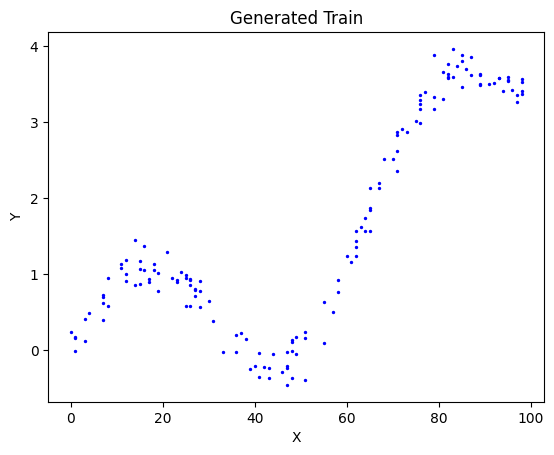

In [76]:
plt.scatter(x_train, y_train, color='blue', s=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Train')
plt.show()

We will assume the polynomial regression problem of the following form:
$$ y=a_0+a_1x+a_2x^2+...+a_dx^d $$
The function ```get_solution``` will find the cofficients, similarly to methods done in simple linear regression. <br/>
The function ```calc``` will recieve a new sample and the cofficients found, and will predict the output.





In [77]:
def get_solution(X, y, degree=2):
    # Implement here

    #Implementing polynomial transformation according to the formula
    poly_X = X.copy() #Creating a copy of X
    for i in range(2, degree+1):
        poly_X = np.concatenate((poly_X, X ** i), axis=1)

    b = np.ones((poly_X.shape[0], 1)) #creating n*1 matrix of 1's where n is number of rows in data
    Y = np.concatenate([b,poly_X], axis=1) #converting data samples to augmented vectors by adding 1's column to them
    w = Y.T @ Y # (Y^T)*Y
    w = np.linalg.inv(w) # ((Y^T)*Y)^-1
    w = w @ Y.T # (((Y^T)*Y)^-1)*Y^T
    w = w @ y # ((((Y^T)*Y)^-1)*Y^T)*y
    return w

def calc(x, coefs):
    # Implement here
    y_pred = 0 #initiallizing the predicted target to be 0
    for i in range(len(coefs)):
        y_pred += coefs[i] * x ** i #Computing the predicted target by multiplying each sample by the weight vector, in addition to w0 that is being added in the first iteration
    return y_pred

Running the current code with $d=1$ yields a simple regressor.
- Which $d$ works best?
- According to your previous answer, which $d$ <u>is expected</u> to work the best?
- Try to explain what happens when you try $d+1$ and why? Was the solver you implemented enough?

<font color='red'>Write your answers here and explain them</br>- all the d's starting from d=4 appears to fit the dataset pattern and capturing its trend. </br> - I expect d=4 to work the best, because it's the smallest one that's able to capture the data trend. Thus, choosing d that is larger than 4 will give the model more flexibility that could make it capture the noise, which will badly affect the generalization on test data (actually larger than 5, because even d=5 not seems to capture the small variations). </br> - When choosing d+1 the model might start fit the training dataset, which means, it will start capture the noise in addition to the data pattern which affect negatively its ability to generalize to unseen data.</font>

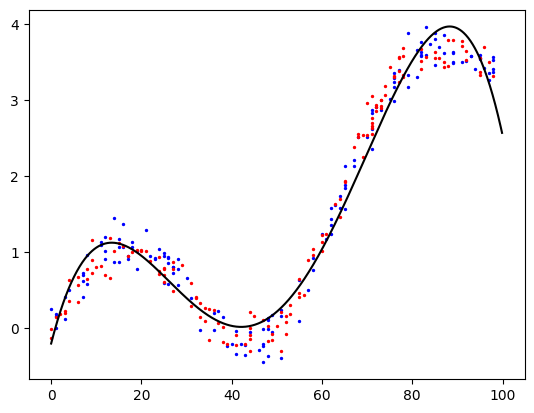

In [78]:
xx = np.arange(0, 100, 0.1)
yy = []

weights = get_solution(x_train, y_train, 4)

for samp in xx:
  yy.append(calc(samp, weights))

plt.scatter(x_train, y_train, color='blue', s=2, label='train')
plt.scatter(x_test, y_test, color='red', s=2, label='test')
plt.plot(xx, yy, color='black')
plt.show()